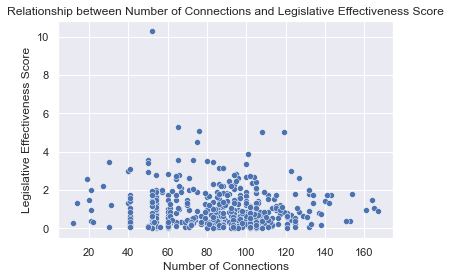

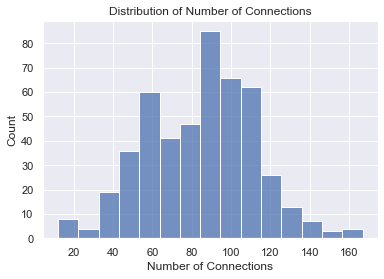

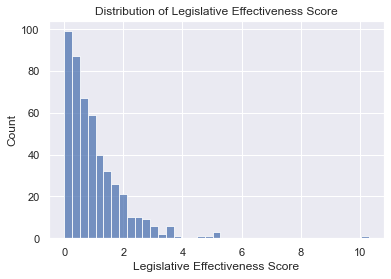

In [92]:
"""
Name: analysis.ipynb
Author: Lynette Dang

Initial findings (in Jupyter Notebook)
"""

import scipy.stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot

df_analysis = pd.read_csv("analysis.csv")

x = np.array(df_analysis["Number of Connections"])
y = np.array(df_analysis["Legislative Effectiveness Score"])
 
df = [['Pearson Correlation',  scipy.stats.pearsonr(x, y)[0], scipy.stats.pearsonr(x, y)[1]],
          ['Spearman Correlation', scipy.stats.spearmanr(x, y)[0], scipy.stats.spearmanr(x, y)[1]]]

df = pd.DataFrame(
    df, columns=['Test', 'correlation coefficient', 'p_value']);
sns.set_theme();
sns.scatterplot(
    data=df_analysis, x="Number of Connections", y="Legislative Effectiveness Score").set(title='Relationship between Number of Connections and Legislative Effectiveness Score')
plot.show()
sns.histplot(data=df_analysis, x="Number of Connections").set(title='Distribution of Number of Connections')
plot.show()
plot.show()
sns.histplot(
    data=df_analysis, x="Legislative Effectiveness Score").set(title='Distribution of Legislative Effectiveness Score')
plot.show()

In [41]:
df

,Test,correlation coefficient,p_value
0,Pearson Correlation,-0.032418,0.478126
1,Spearman Correlation,0.029598,0.517256


In [82]:
import networkx as nx
import matplotlib.pyplot as plt
import json
from collections import Counter
from operator import itemgetter 
with open('ind_network.json') as json_file:
    network = json.load(json_file)
g = nx.DiGraph()
g.add_nodes_from(network.keys())
for k, v in network.items():
    g.add_edges_from(([(k, t) for t in v if (t, k) not in g.edges()]))

In [83]:
print(nx.info(g))

DiGraph with 555 nodes and 20610 edges


In [95]:
nx.density(g)

0.06703092984681433

In [94]:
bc = nx.betweenness_centrality(g, normalized=True, endpoints=True)
sorted(bc.items(), key = itemgetter(1), reverse = True)[:10]

[('David Trone', 0.03289908435985153),
 ('Rodney Davis', 0.01845311572398541),
 ('Tom Udall', 0.01805118261797313),
 ('Richard Shelby', 0.016612765688881852),
 ('Amy Klobuchar', 0.01497808918546075),
 ('G.K. Butterfield', 0.014060058929918942),
 ('Susan Davis', 0.013177918478497391),
 ('Carolyn B. Maloney', 0.012992225292953689),
 ('Zoe Lofgren', 0.012755594792187925),
 ('Rob Portman', 0.012499444038317382)]

In [86]:
ec = nx.eigenvector_centrality_numpy(g, max_iter=500)
sorted(ec.items(), key = itemgetter(1), reverse = True)[:10]

[('Mike Kelly', 0.4447887978181395),
 ('Drew Ferguson', 0.37881677729887714),
 ('Darin LaHood', 0.32264507941910275),
 ('Vern Buchanan', 0.2747744627624378),
 ('Brian Babin', 0.24373995924474792),
 ('Ron Estes', 0.23401933002426023),
 ('Conor Lamb', 0.23069954432825623),
 ('Jason Smith', 0.21135912938124368),
 ('Mike Garcia', 0.20758793007598864),
 ('Randy Weber', 0.17679804676574407)]

In [88]:
cc = nx.closeness_centrality(g)
sorted(cc.items(), key = itemgetter(1), reverse = True)[:10]

[('Lloyd Doggett', 0.4604272645224811),
 ('Donald Sternoff Beyer Jr.', 0.456227884061497),
 ('Brian Babin', 0.4409471074167812),
 ('Mike Garcia', 0.43965686290268136),
 ('Randy Weber', 0.4383675360528196),
 ('Jason Smith', 0.43710319930287567),
 ('Eddie Bernice Johnson', 0.4357916451779268),
 ('Lizzie Pannill Fletcher', 0.4345050860909205),
 ('Daniel Lipinski', 0.43193475302916207),
 ('Conor Lamb', 0.43000695811712725)]

In [89]:
dc = nx.degree_centrality(g)
sorted(dc.items(), key = itemgetter(1), reverse = True)[:10]

[('Stephen Lynch', 0.27256317689530685),
 ('Salud Carbajal', 0.25992779783393505),
 ('Alma Adams', 0.2581227436823105),
 ('Anthony G. Brown', 0.2545126353790614),
 ('Mark DeSaulnier', 0.2527075812274368),
 ('Stacey Plaskett', 0.24007220216606498),
 ('William Lacy Clay', 0.2364620938628159),
 ('Steve Cohen', 0.23465703971119134),
 ('Dina Titus', 0.2328519855595668),
 ('Brad Sherman', 0.23104693140794225)]

In [19]:
nx.average_clustering(g)

0.34320317459854066

In [91]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities

#preform the community detection
c = list(greedy_modularity_communities(g))

#Let's find out how many communities we detected
print(len(c))
c

5


[frozenset({'Abby Finkenauer',
            'Abigail Spanberger',
            'Adam Kinzinger',
            'Adam Schiff',
            'Adrian Smith',
            'Adriano Espaillat',
            'Al Green',
            'Alan Lowenthal',
            'Albio Sires',
            'Alexandria Ocasio-Cortez',
            'Alma Adams',
            'Ami Bera',
            'Andrew Kim',
            'André Carson',
            'Andy Biggs',
            'Andy Levin',
            'Angie Craig',
            'Ann Wagner',
            'Anthony Brindisi',
            'Anthony G. Brown',
            'Antonio Delgado',
            'Aumua Amata Radewagen',
            'Austin Scott',
            'Ayanna Pressley',
            'Barbara Lee',
            'Benjamin Lee Cline',
            'Bennie Thompson',
            'Bill Flores',
            'Bill Johnson',
            'Bill Keating',
            'Bill Pascrell',
            'Bob Gibbs',
            'Bonnie Watson Coleman',
            'Brad Schneider',
